In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [3]:
type(model)

sklearn.linear_model._base.LinearRegression

In [4]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('tasico_Shared_Room.csv')
df.head(2)

,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,178,https://www.airbnb.com/rooms/4372384,2024-09-05,Including continental breakfast provided as ro...,https://www.airbnb.com/users/show/22700250,2014-10-19,within an hour,100%,100%,f,...,5.0,5.0,4.9,5.0,3.0,0.0,0.0,0.0,0.13,3
1,307,https://www.airbnb.com/rooms/6391530,2024-09-05,The Racecourse Inn was purpose built in 1860 a...,https://www.airbnb.com/users/show/33324258,2015-05-13,No hay tiempo de respuesta,No hay porcentaje de respuesta,No hay porcentaje de aceptacion,f,...,5.0,5.0,5.0,5.0,3.0,0.0,0.0,0.0,0.02,3


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

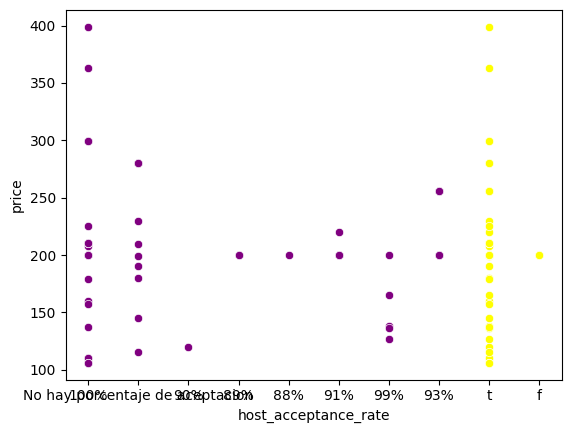

In [5]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='yellow',data=df)

In [6]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [7]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No hay porcentaje de aceptacion", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [8]:
#model.__dict__ se utiliza para ver los atributos del modelo
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-7.01127796]),
 'rank_': 1,
 'singular_': array([2.91065767]),
 'intercept_': np.float64(213.46903502592036)}

In [9]:
#Predecimos los valores del total de la variable independiente
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([206.45775707, 213.46903503, 206.45775707, 207.15888486,
       213.46903503, 213.46903503, 213.46903503, 206.45775707,
       206.45775707, 206.45775707, 206.45775707, 206.45775707,
       207.22899764, 213.46903503, 213.46903503, 206.45775707,
       207.29911042, 206.45775707, 207.08877208, 206.52786985,
       213.46903503, 206.45775707, 206.45775707, 206.45775707,
       206.52786985, 206.52786985, 206.45775707, 206.45775707,
       206.45775707, 206.45775707, 206.45775707, 206.45775707,
       206.45775707, 213.46903503, 213.46903503, 213.46903503,
       206.45775707, 206.45775707, 206.45775707, 206.45775707,
       206.45775707, 206.45775707, 206.45775707, 206.94854652,
       206.94854652, 206.94854652, 206.94854652, 206.94854652,
       206.45775707, 206.45775707, 206.94854652, 206.94854652,
       206.94854652, 206.94854652, 206.94854652, 206.94854652,
       206.94854652, 206.94854652, 206.94854652, 206.94854652,
       206.94854652, 206.94854652, 206.94854652, 206.45

In [10]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

,Predicciones,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,206.457757,178,https://www.airbnb.com/rooms/4372384,2024-09-05,Including continental breakfast provided as ro...,https://www.airbnb.com/users/show/22700250,2014-10-19,within an hour,100%,1.00,...,5.00,5.00,4.90,5.00,3.0,0.0,0.0,0.0,0.13,3
1,213.469035,307,https://www.airbnb.com/rooms/6391530,2024-09-05,The Racecourse Inn was purpose built in 1860 a...,https://www.airbnb.com/users/show/33324258,2015-05-13,No hay tiempo de respuesta,No hay porcentaje de respuesta,0.00,...,5.00,5.00,5.00,5.00,3.0,0.0,0.0,0.0,0.02,3
2,206.457757,308,https://www.airbnb.com/rooms/6392189,2024-09-05,"PIONEER LODGE Open fire, Kitchen , Trout Fishi...",https://www.airbnb.com/users/show/33329640,2015-05-14,No hay tiempo de respuesta,No hay porcentaje de respuesta,1.00,...,4.91,4.97,4.92,4.92,6.0,0.0,0.0,0.0,0.24,3
3,207.158885,453,https://www.airbnb.com/rooms/9905527,2024-09-05,"Romantic retreat for short stay guests, larger...",https://www.airbnb.com/users/show/4547789,2013-01-01,within a few hours,100%,0.90,...,4.83,4.97,4.89,4.92,7.0,6.0,0.0,0.0,0.38,3
4,213.469035,627,https://www.airbnb.com/rooms/13519271,2024-09-05,"Hosted Bed and Breakfast, offering 3 guest roo...",https://www.airbnb.com/users/show/77652944,2016-06-14,No hay tiempo de respuesta,No hay porcentaje de respuesta,0.00,...,5.00,5.00,5.00,5.00,3.0,0.0,0.0,0.0,0.01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,207.088772,2416,https://www.airbnb.com/rooms/38139442,2024-09-05,Our Executive Queen room features a queen size...,https://www.airbnb.com/users/show/285512792,2019-08-13,No hay tiempo de respuesta,No hay porcentaje de respuesta,0.91,...,4.88,4.92,4.96,4.92,6.0,0.0,0.0,0.0,0.40,3
85,207.228998,2434,https://www.airbnb.com/rooms/38489788,2024-09-05,This room is an officially AAA accredited 4 st...,https://www.airbnb.com/users/show/110365837,2017-01-07,within an hour,100%,0.89,...,5.00,4.96,5.00,4.96,5.0,1.0,0.0,0.0,0.42,3
86,206.457757,2462,https://www.airbnb.com/rooms/38911352,2024-09-05,This newly renovated room was originally built...,https://www.airbnb.com/users/show/225157408,2018-11-10,within an hour,100%,1.00,...,4.82,4.91,4.91,4.91,6.0,0.0,0.0,0.0,0.19,3
87,206.457757,2463,https://www.airbnb.com/rooms/38911791,2024-09-05,Our deluxe waterfall view room is comfortable ...,https://www.airbnb.com/users/show/225157408,2018-11-10,within an hour,100%,1.00,...,4.80,4.97,4.96,4.80,6.0,0.0,0.0,0.0,1.55,3


In [11]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0019200824713009323

In [12]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.04381874566097177)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

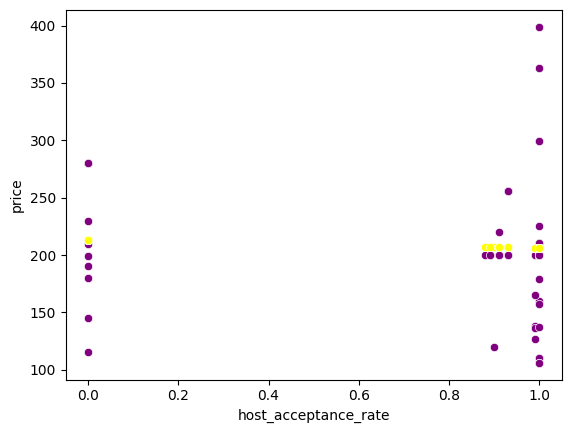

In [13]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='yellow',data = df)

In [14]:
#En esta linea de código se trandforman los valores de las variables categóricas a numéricas
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})

C:\Users\cesar\AppData\Local\Temp\ipykernel_9972\827320779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})


In [15]:
df['room_type'] = 1

In [16]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

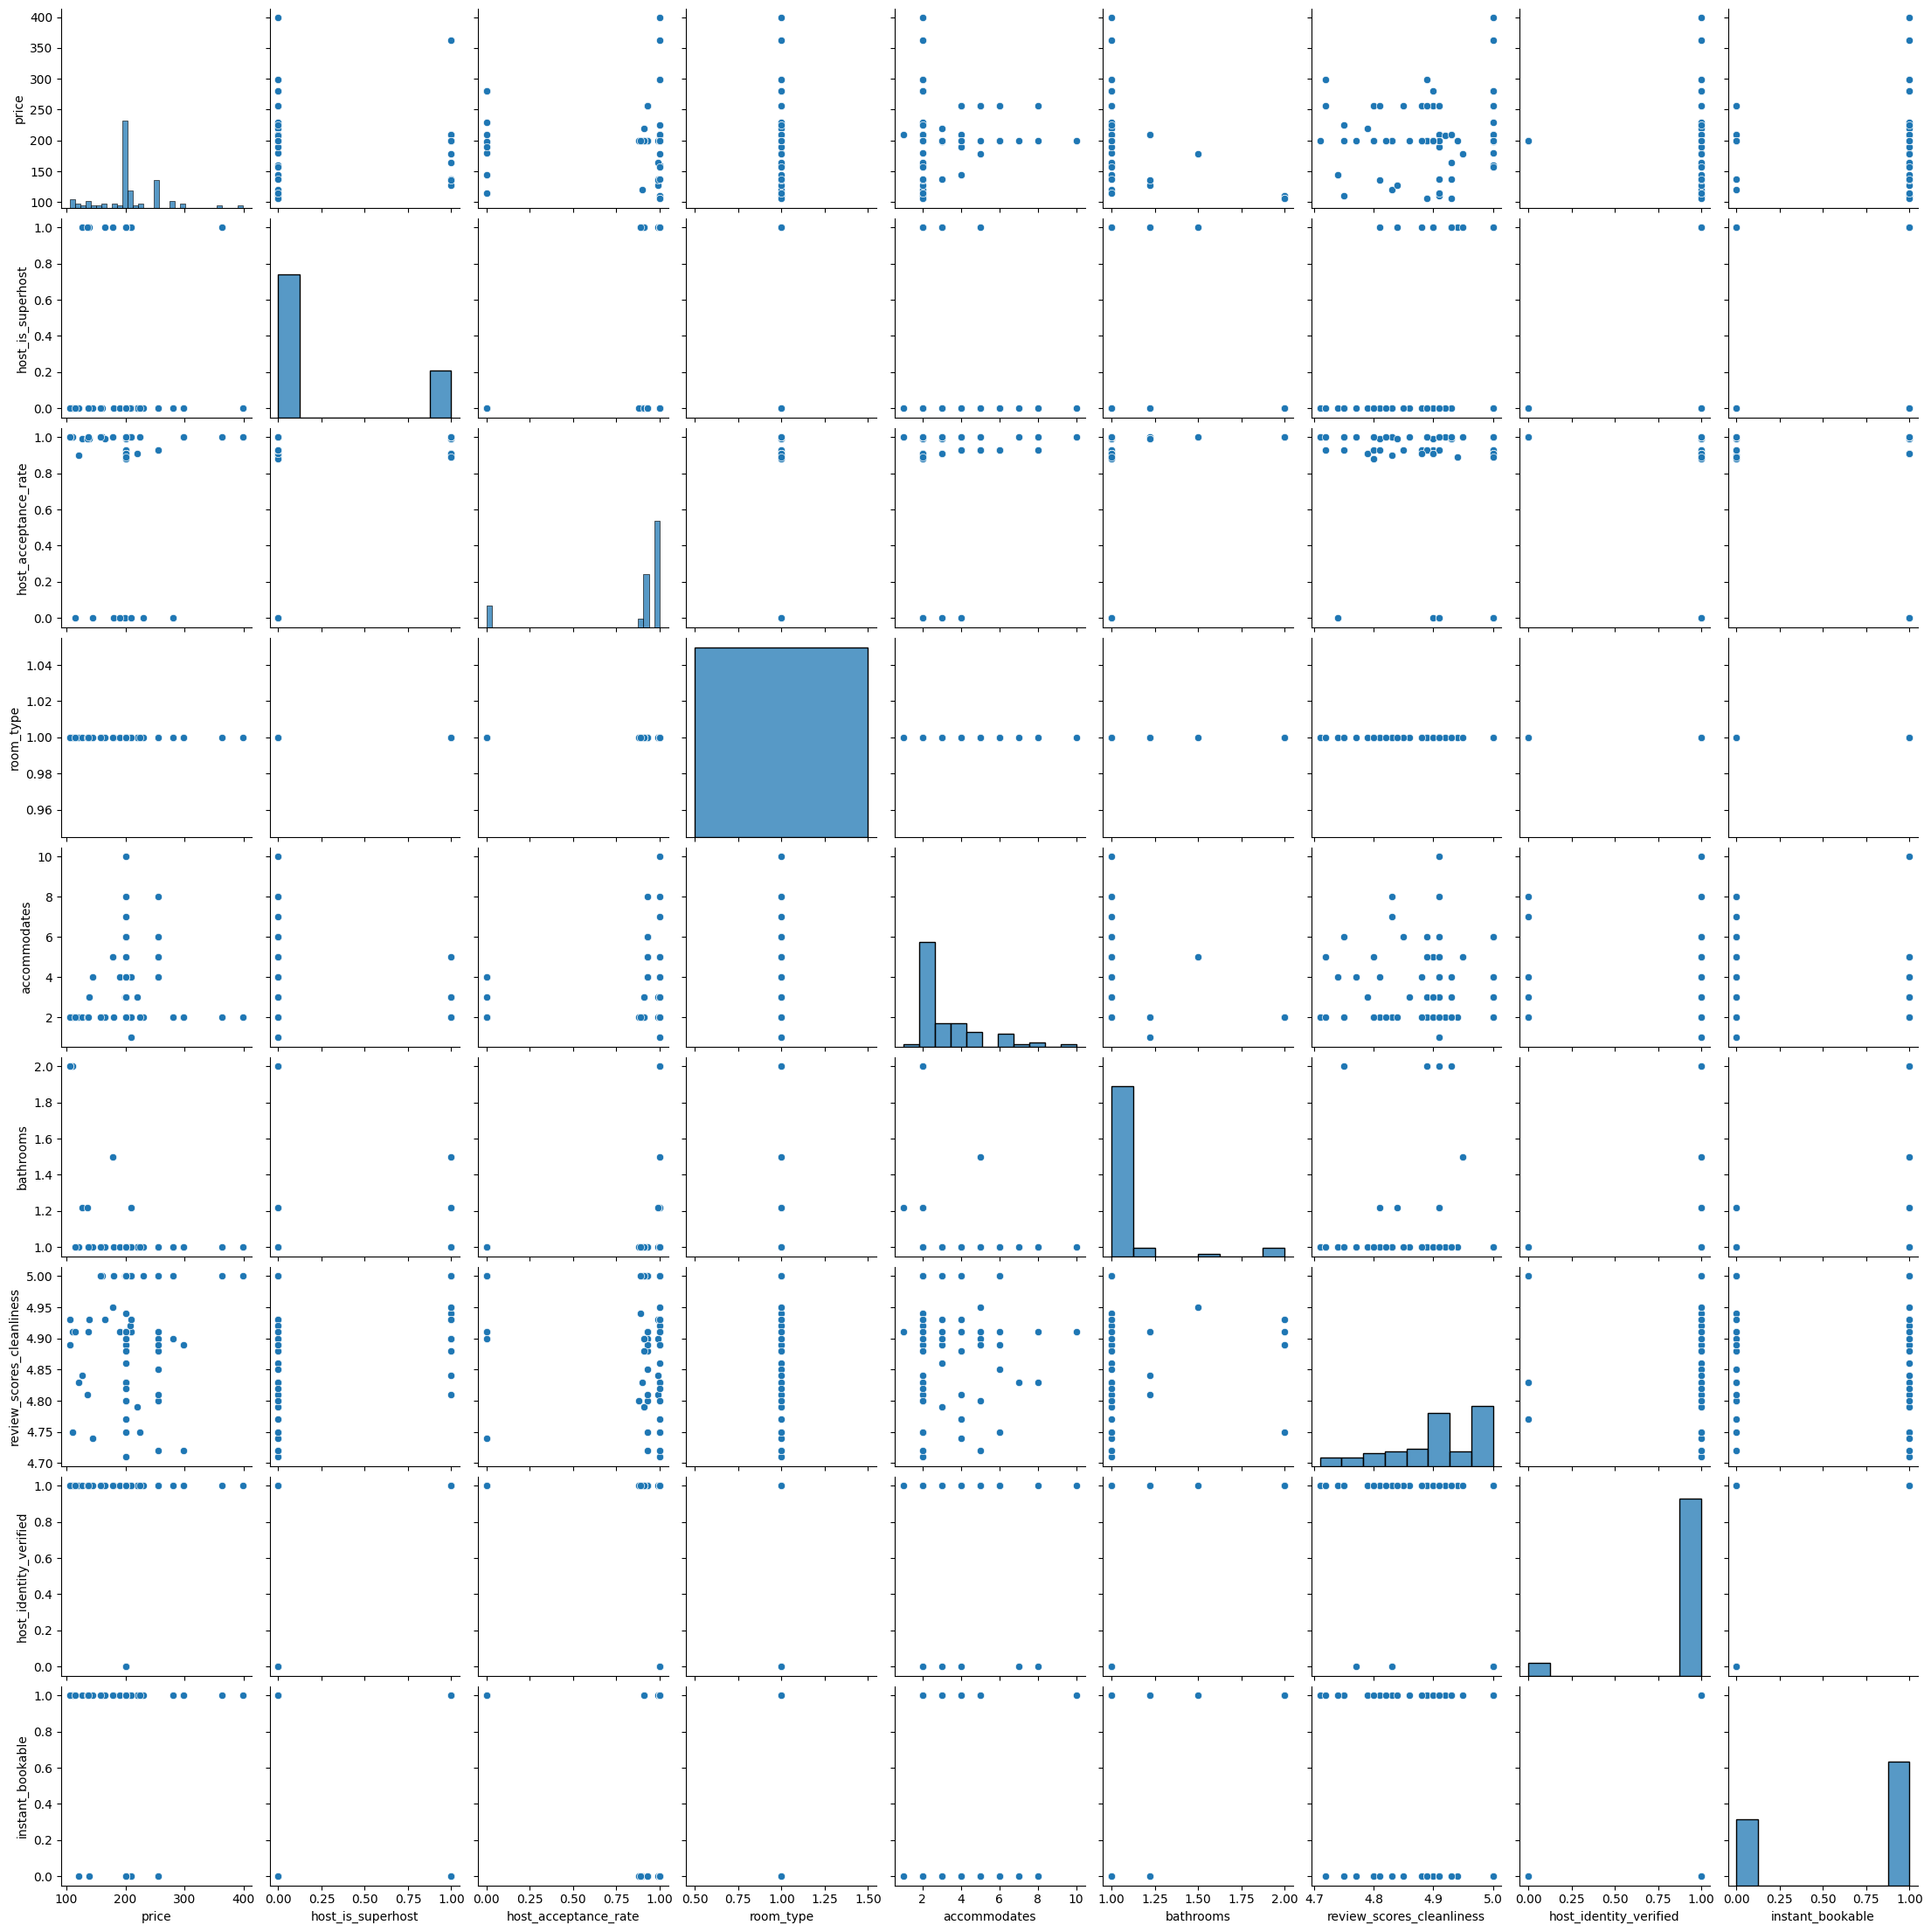

In [17]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [18]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,-0.118849,-0.043819,NaN,0.160062,-0.469978,0.115809,0.040483,-0.179505
host_is_superhost,-0.118849,1.000000,0.189968,NaN,-0.278038,-0.047209,0.263337,0.154067,0.254920
host_acceptance_rate,-0.043819,0.189968,1.000000,NaN,0.104763,0.125950,-0.154456,-0.121219,-0.198902
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.160062,-0.278038,0.104763,NaN,1.000000,-0.149569,-0.182291,-0.187088,-0.490287
bathrooms,-0.469978,-0.047209,0.125950,NaN,-0.149569,1.000000,-0.108902,0.075555,0.157205
review_scores_cleanliness,0.115809,0.263337,-0.154456,NaN,-0.182291,-0.108902,1.000000,0.011702,0.108675
host_identity_verified,0.040483,0.154067,-0.121219,NaN,-0.187088,0.075555,0.011702,1.000000,0.367764
instant_bookable,-0.179505,0.254920,-0.198902,NaN,-0.490287,0.157205,0.108675,0.367764,1.000000


In [19]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.118849,0.043819,NaN,0.160062,0.469978,0.115809,0.040483,0.179505
host_is_superhost,0.118849,1.000000,0.189968,NaN,0.278038,0.047209,0.263337,0.154067,0.254920
host_acceptance_rate,0.043819,0.189968,1.000000,NaN,0.104763,0.125950,0.154456,0.121219,0.198902
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.160062,0.278038,0.104763,NaN,1.000000,0.149569,0.182291,0.187088,0.490287
bathrooms,0.469978,0.047209,0.125950,NaN,0.149569,1.000000,0.108902,0.075555,0.157205
review_scores_cleanliness,0.115809,0.263337,0.154456,NaN,0.182291,0.108902,1.000000,0.011702,0.108675
host_identity_verified,0.040483,0.154067,0.121219,NaN,0.187088,0.075555,0.011702,1.000000,0.367764
instant_bookable,0.179505,0.254920,0.198902,NaN,0.490287,0.157205,0.108675,0.367764,1.000000


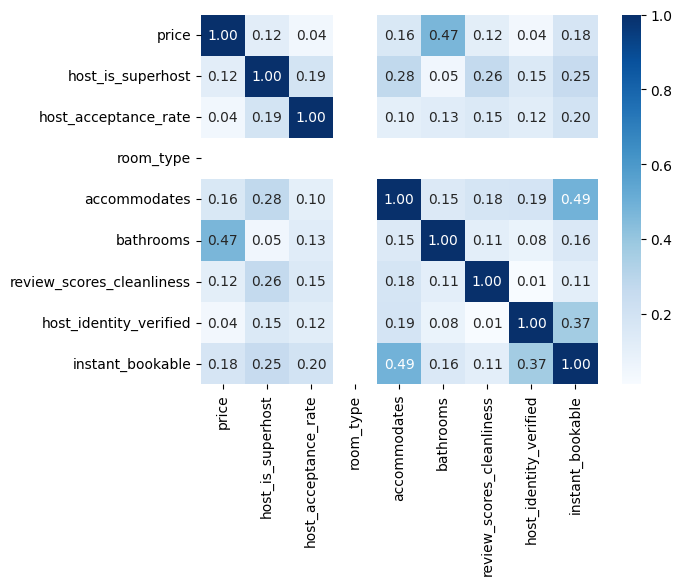

In [20]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Blues', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

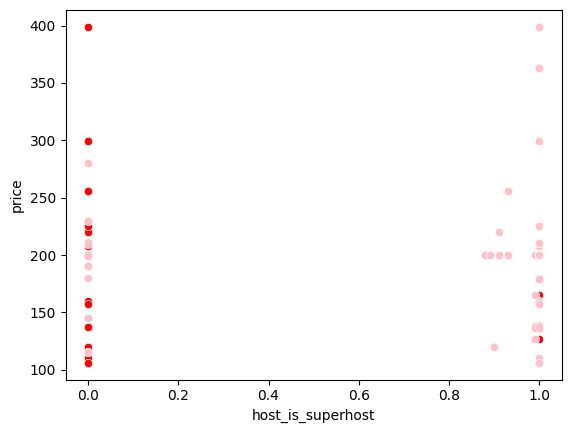

In [21]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='pink',data=df)

In [22]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [23]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [24]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-13.60098372]),
 'rank_': 1,
 'singular_': array([4.06961887]),
 'intercept_': np.float64(210.79507462686567)}

In [25]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.01412509477602042

In [26]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([210.79507463, 210.79507463, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       197.19409091, 210.79507463, 210.79507463, 197.19409091,
       210.79507463, 197.19409091, 210.79507463, 197.19409091,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       197.19409091, 197.19409091, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79507463,
       210.79507463, 210.79507463, 210.79507463, 210.79

In [27]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_predic)
df

,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,210.795075,160.0,0,1.00,1,2.0,1.0,5.00,1,1
1,210.795075,180.0,0,0.00,1,2.0,1.0,5.00,1,1
2,210.795075,200.0,0,1.00,1,10.0,1.0,4.91,1,1
3,210.795075,120.0,0,0.90,1,2.0,1.0,4.83,1,0
4,210.795075,280.0,0,0.00,1,2.0,1.0,5.00,1,1
...,...,...,...,...,...,...,...,...,...,...
84,197.194091,200.0,1,0.91,1,2.0,1.0,4.88,1,1
85,197.194091,200.0,1,0.89,1,2.0,1.0,5.00,1,0
86,210.795075,200.0,0,1.00,1,2.0,1.0,4.82,1,1
87,210.795075,200.0,0,1.00,1,2.0,1.0,4.80,1,1


In [28]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.01412509477602042

In [29]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.11884904196509292)

<Axes: xlabel='host_is_superhost', ylabel='price'>

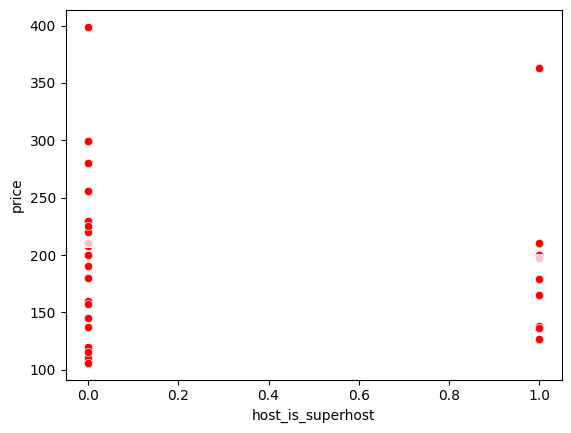

In [30]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost',y='price',color='red',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones1',color='pink',data = df)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

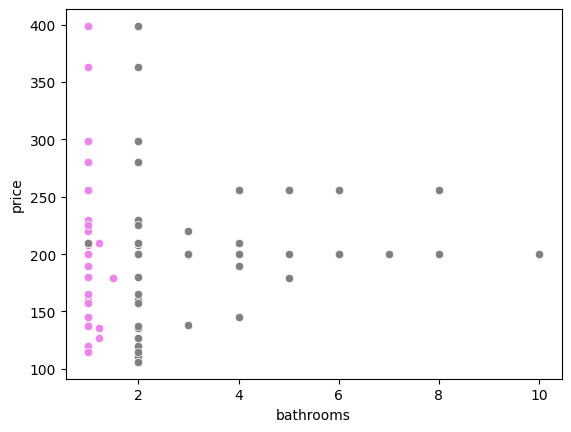

In [31]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='violet',data=df)
sns.scatterplot(x='accommodates',y='price',color='grey',data=df)

In [32]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [33]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [34]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-107.8554925]),
 'rank_': 1,
 'singular_': array([2.02937971]),
 'intercept_': np.float64(321.80833013946767)}

In [35]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.22087899330632776

In [36]:
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([213.95283764, 213.95283764, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       106.09734513, 106.09734513, 106.09734513, 106.09734513,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       213.95283764, 160.02509139, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       190.22462929, 190.22462929, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95283764,
       213.95283764, 213.95283764, 213.95283764, 213.95

In [37]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)

<Axes: xlabel='bathrooms', ylabel='price'>

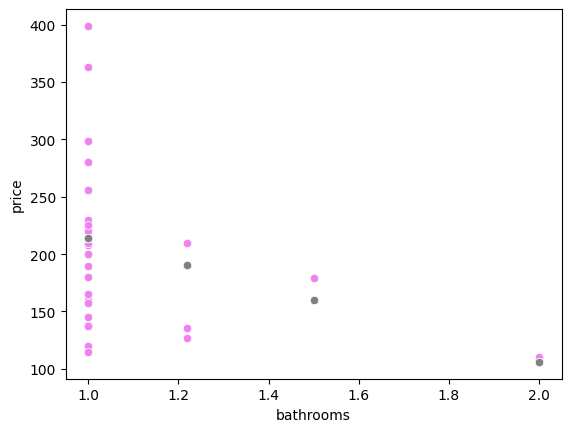

In [38]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms',y='price',color='violet',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='gray',data = df)

In [39]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.22087899330632776

In [40]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.4699776519222247)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

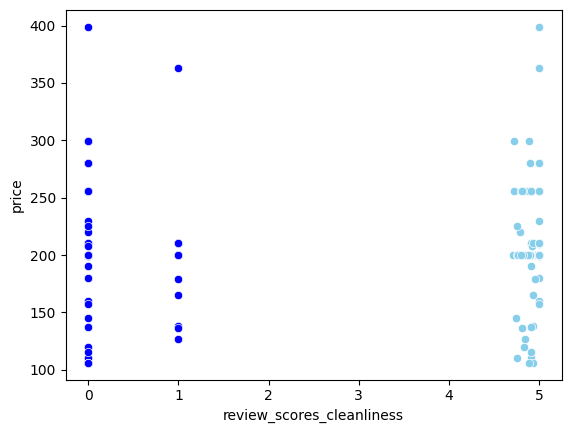

In [41]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)

In [42]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [43]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [44]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([70.30651388]),
 'rank_': 1,
 'singular_': array([0.76714413]),
 'intercept_': np.float64(-137.66925452580668)}

In [45]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.01341183834683235

In [46]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([213.86331486, 213.86331486, 207.53572862, 201.91120751,
       213.86331486, 213.86331486, 206.83266348, 207.53572862,
       207.53572862, 196.2866864 , 208.94185889, 206.12959834,
       209.64492403, 213.86331486, 213.86331486, 213.86331486,
       199.80201209, 210.34798917, 199.09894695, 208.94185889,
       213.86331486, 207.53572862, 213.86331486, 206.12959834,
       206.83266348, 208.94185889, 201.91120751, 213.86331486,
       193.47442584, 207.53572862, 206.12959834, 194.17749098,
       196.2866864 , 195.58362126, 207.53572862, 207.53572862,
       207.53572862, 207.53572862, 208.94185889, 213.86331486,
       207.53572862, 207.53572862, 207.53572862, 205.4265332 ,
       207.53572862, 206.83266348, 194.17749098, 207.53572862,
       204.02040292, 213.86331486, 206.12959834, 196.2866864 ,
       213.86331486, 213.86331486, 207.53572862, 199.80201209,
       203.31733778, 207.53572862, 206.12959834, 213.86331486,
       207.53572862, 200.50507723, 213.86331486, 201.91

In [47]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

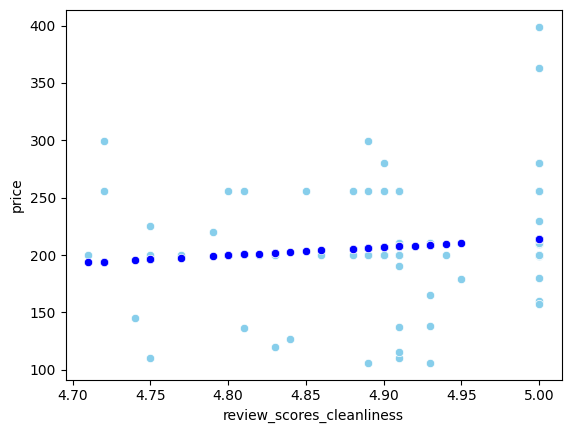

In [48]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='blue',data = df)

In [49]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.01341183834683235

In [50]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.11580949160942013)

price vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

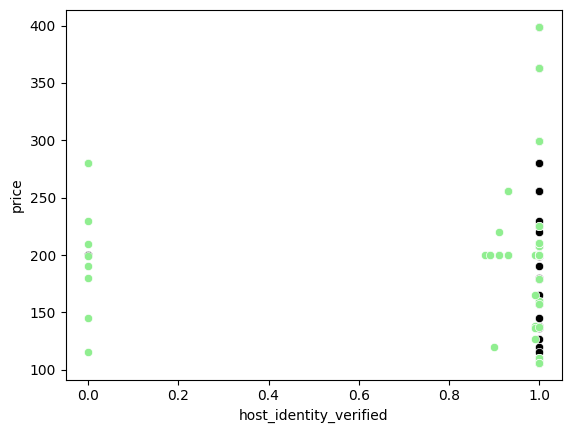

In [51]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='black',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='lightgreen',data=df)

In [52]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [53]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [54]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([7.97036145]),
 'rank_': 1,
 'singular_': array([2.36548211]),
 'intercept_': np.float64(200.0)}

In [55]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0016388477961264414

In [56]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 207.97036145,
       207.97036145, 207.97036145, 207.97036145, 200.  

In [57]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,207.970361,213.863315,213.952838,210.795075,160.0,0,1.00,1,2.0,1.0,5.00,1,1
1,207.970361,213.863315,213.952838,210.795075,180.0,0,0.00,1,2.0,1.0,5.00,1,1
2,207.970361,207.535729,213.952838,210.795075,200.0,0,1.00,1,10.0,1.0,4.91,1,1
3,207.970361,201.911208,213.952838,210.795075,120.0,0,0.90,1,2.0,1.0,4.83,1,0
4,207.970361,213.863315,213.952838,210.795075,280.0,0,0.00,1,2.0,1.0,5.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,207.970361,205.426533,213.952838,197.194091,200.0,1,0.91,1,2.0,1.0,4.88,1,1
85,207.970361,213.863315,213.952838,197.194091,200.0,1,0.89,1,2.0,1.0,5.00,1,0
86,207.970361,201.208142,213.952838,210.795075,200.0,0,1.00,1,2.0,1.0,4.82,1,1
87,207.970361,199.802012,213.952838,210.795075,200.0,0,1.00,1,2.0,1.0,4.80,1,1


<Axes: xlabel='host_identity_verified', ylabel='price'>

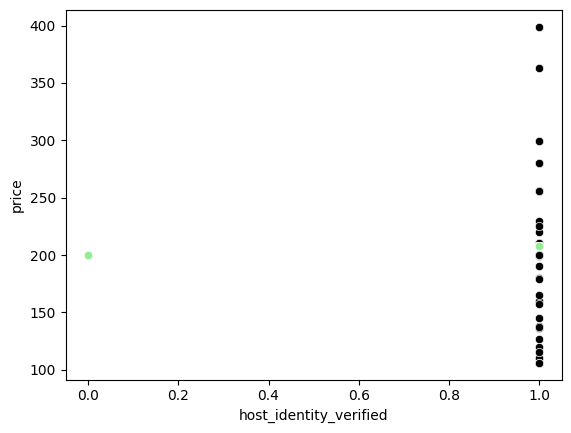

In [58]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified',y='price',color='black',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones4',color='lightgreen',data = df)

In [59]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0016388477961264414

In [60]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.04048268513977848)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

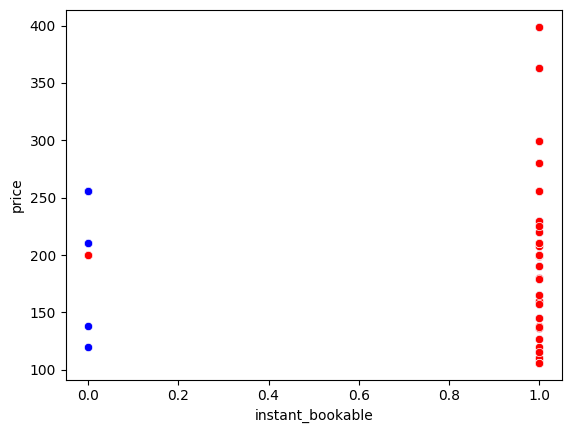

In [61]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [62]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [63]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [64]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-18.59971079]),
 'rank_': 1,
 'singular_': array([4.494691]),
 'intercept_': np.float64(219.5541935483871)}

In [65]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.03222220940247633

In [66]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([200.95448276, 200.95448276, 200.95448276, 219.55419355,
       200.95448276, 200.95448276, 200.95448276, 200.95448276,
       200.95448276, 200.95448276, 200.95448276, 200.95448276,
       219.55419355, 200.95448276, 200.95448276, 200.95448276,
       219.55419355, 200.95448276, 200.95448276, 219.55419355,
       200.95448276, 200.95448276, 200.95448276, 200.95448276,
       200.95448276, 200.95448276, 200.95448276, 200.95448276,
       200.95448276, 200.95448276, 200.95448276, 200.95448276,
       200.95448276, 200.95448276, 200.95448276, 200.95448276,
       219.55419355, 219.55419355, 200.95448276, 200.95448276,
       200.95448276, 200.95448276, 200.95448276, 219.55419355,
       219.55419355, 219.55419355, 219.55419355, 219.55419355,
       200.95448276, 200.95448276, 219.55419355, 219.55419355,
       219.55419355, 219.55419355, 219.55419355, 219.55419355,
       219.55419355, 219.55419355, 219.55419355, 219.55419355,
       219.55419355, 219.55419355, 219.55419355, 219.55

In [67]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,200.954483,207.970361,213.863315,213.952838,210.795075,160.0,0,1.00,1,2.0,1.0,5.00,1,1
1,200.954483,207.970361,213.863315,213.952838,210.795075,180.0,0,0.00,1,2.0,1.0,5.00,1,1
2,200.954483,207.970361,207.535729,213.952838,210.795075,200.0,0,1.00,1,10.0,1.0,4.91,1,1
3,219.554194,207.970361,201.911208,213.952838,210.795075,120.0,0,0.90,1,2.0,1.0,4.83,1,0
4,200.954483,207.970361,213.863315,213.952838,210.795075,280.0,0,0.00,1,2.0,1.0,5.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,200.954483,207.970361,205.426533,213.952838,197.194091,200.0,1,0.91,1,2.0,1.0,4.88,1,1
85,219.554194,207.970361,213.863315,213.952838,197.194091,200.0,1,0.89,1,2.0,1.0,5.00,1,0
86,200.954483,207.970361,201.208142,213.952838,210.795075,200.0,0,1.00,1,2.0,1.0,4.82,1,1
87,200.954483,207.970361,199.802012,213.952838,210.795075,200.0,0,1.00,1,2.0,1.0,4.80,1,1


<Axes: xlabel='instant_bookable', ylabel='price'>

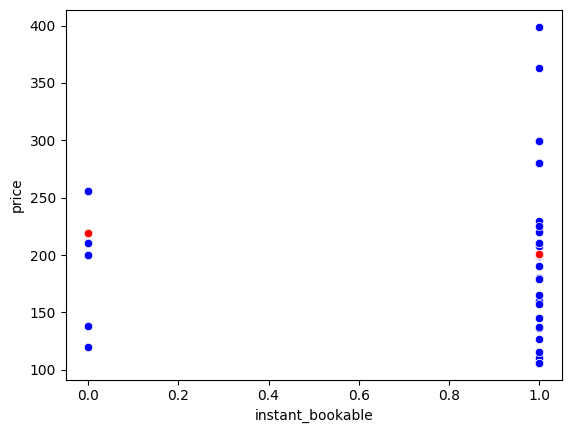

In [68]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [69]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.03222220940247633

In [70]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.17950545786264085)